# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

# 1. Loading Data

In [1]:
import sys
sys.path.insert(0, 'F:\GIT\AI-Course-Python\AI-Python\PythonEnv1\packages')
from MLPckg import MLClass as ml

In [10]:
pathOfData = 'F:\GIT\AI-Course-Python\AI-Python\PythonEnv1\ML\data'
fileDataName = 'Concrete_Data.xls'

df= ml.readDataPandas(pathOfData,fileDataName)
df.columns = ['Cement','Blast','FlyAsh','Water','Superplasticizer','Coarse','FineAgg','Age','ConcreteStength']
df.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,281.185326,73.869631,54.163703,181.547862,6.200782,973.023955,773.590622,45.679300,35.821156
std,104.556047,86.317066,64.023167,21.357695,5.975928,77.718027,80.213528,63.198226,16.713463
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,730.400000,7.000000,23.696601
50%,273.000000,22.000000,0.000000,185.000000,6.350000,968.000000,779.700000,28.000000,34.487590
75%,350.000000,143.000000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.201787
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# 2. Data Pre-processing

## 2.1 Outliers Handling

In [11]:
# df_clean = ml.ol_uniIQR(df)
# df_clean = ml.ol_zScore(df)
# df_clean = ml.ol_meanStd(df)
df_clean = ml.ol_multiIQR(df)
df_clean.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,275.778883,73.832074,57.996915,180.596064,6.243090,974.925266,776.566064,32.380851,34.890179
std,101.941679,86.399221,64.394052,18.748390,5.342797,77.604239,75.112813,28.573535,16.601128
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.900000,0.000000,932.000000,740.575000,7.000000,22.605505
50%,255.500000,20.000000,0.000000,183.800000,6.930000,968.000000,780.000000,28.000000,33.398907
75%,349.000000,145.000000,118.382500,192.000000,10.300000,1031.500000,822.200000,28.000000,44.693558
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,120.000000,79.400056


## 2.2 Features Selection

In [12]:
X=df_clean.iloc[:,:-1]
y=df_clean.iloc[:,-1]

# 3. Building the Model

Ridge regression: 
 R-Squared:  0.834531667606086 
 MAE:  5.397088044353667 
 MSE:  50.51614463669857 

Lasso regression: 
 R-Squared:  0.833918554441408 
 MAE:  5.39603399267834 
 MSE:  50.70332313096054 

Best regression:  ridge  -- with error r2:  0.834531667606086




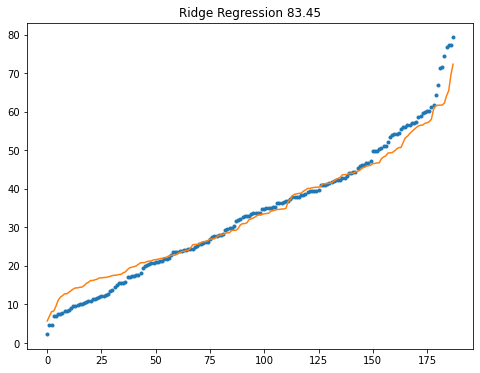

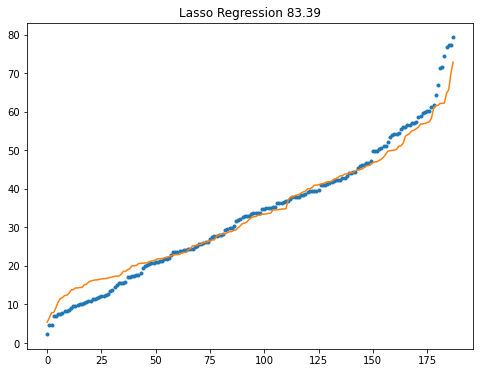

In [14]:
# 0- Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 30, shuffle = True )

# 0.1- Scale features
# X_train,X_test = ml.dp_scaleFeatures(X_train,X_test)

# 1- Find Ridge & Lasso
ridge_pred = ml.mod_alphaRegulariz(X_train, X_test, y_train, y_test, 'Ridge')
lasso_pred = ml.mod_alphaRegulariz(X_train, X_test, y_train, y_test, 'Lasso')

# 3- Calculate Scores
ridge_error_r2, ridge_error_mae, ridge_error_mse = ml.mod_scores(y_test,ridge_pred)
lasso_error_r2, lasso_error_mae, lasso_error_mse = ml.mod_scores(y_test,lasso_pred)

# 4- Print all scores

print('Ridge regression: \n', 
'R-Squared: ',ridge_error_r2,'\n', 
'MAE: ', ridge_error_mae,'\n', 
'MSE: ', ridge_error_mse,'\n=================\n')

print('Lasso regression: \n', 
'R-Squared: ',lasso_error_r2,'\n', 
'MAE: ', lasso_error_mae,'\n', 
'MSE: ', lasso_error_mse,'\n=================\n')

# 4- Select the best r2 error
r2_errors = {ridge_error_r2:"ridge",lasso_error_r2:"lasso"}
preds = {"ridge":ridge_pred,"lasso":lasso_pred}

bestPred = preds.get(r2_errors.get(max(r2_errors)))

print('Best regression: ', r2_errors.get(max(r2_errors)), ' -- with error r2: ', max(r2_errors))
print('\n')

# 4- Draw Graphs

# Ridge 
ml.mod_drawPred(y_test, ridge_pred, 'Ridge Regression %s' % ( round(ridge_error_r2 *100,2) ))

# Lasso 
ml.mod_drawPred(y_test, lasso_pred, 'Lasso Regression %s' % ( round(lasso_error_r2 *100,2) ))